## NLP:Natural Language Preprocessing

In [1]:
#pip install wordcloud

In [2]:
import math
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import  WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from sklearn.decomposition import TruncatedSVD

In [3]:
#nltk.download("stopwords")
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [4]:
corpus_0="""The beneficiaries of the Women AI and Data Academy program are Amazons.
They are currently learning data visualization, machine learning,deep learning,
web scraping as well as all the concepts of data and AI. 
They learn how algs work up to the implementation of models,
of course taking into account the recovery of data, 
the storage of the latter and streaming allowing visualizations for BI purpose."""

In [5]:
#corpus=""""Les bénéficiaires du programme de Women IA et Data Academy sont des amazones.
#Elles sont entrain d'apprendre la data visualisation,le machine learning,le web scraping et aussi tous les concepts de la data et de l'IA.
#Elles apprennent du fonctionnement des algs jusqu'à la mise en place des modèles en passant bien sûr compte de la récupération des données,le stockages de ces dernières et le streaming permettant d'avoir des visualistaions à des fins bi"""

In [6]:
corpus=corpus_0.lower()

In [7]:
corpus_0

'The beneficiaries of the Women AI and Data Academy program are Amazons.\nThey are currently learning data visualization, machine learning,deep learning,\nweb scraping as well as all the concepts of data and AI. \nThey learn how algs work up to the implementation of models,\nof course taking into account the recovery of data, \nthe storage of the latter and streaming allowing visualizations for BI purpose.'

In [8]:
corpus=corpus_0.replace(".",'').replace(",","").replace('\n',"")

In [9]:
corpus

'The beneficiaries of the Women AI and Data Academy program are AmazonsThey are currently learning data visualization machine learningdeep learningweb scraping as well as all the concepts of data and AI They learn how algs work up to the implementation of modelsof course taking into account the recovery of data the storage of the latter and streaming allowing visualizations for BI purpose'

In [10]:
stop_w=stopwords.words("english")

In [11]:
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
tokens=word_tokenize(corpus)
tokens

['The',
 'beneficiaries',
 'of',
 'the',
 'Women',
 'AI',
 'and',
 'Data',
 'Academy',
 'program',
 'are',
 'AmazonsThey',
 'are',
 'currently',
 'learning',
 'data',
 'visualization',
 'machine',
 'learningdeep',
 'learningweb',
 'scraping',
 'as',
 'well',
 'as',
 'all',
 'the',
 'concepts',
 'of',
 'data',
 'and',
 'AI',
 'They',
 'learn',
 'how',
 'algs',
 'work',
 'up',
 'to',
 'the',
 'implementation',
 'of',
 'modelsof',
 'course',
 'taking',
 'into',
 'account',
 'the',
 'recovery',
 'of',
 'data',
 'the',
 'storage',
 'of',
 'the',
 'latter',
 'and',
 'streaming',
 'allowing',
 'visualizations',
 'for',
 'BI',
 'purpose']

In [13]:
stop_w_corpus = [ elt for elt in tokens if elt in stop_w]
stop_w_corpus 

['of',
 'the',
 'and',
 'are',
 'are',
 'as',
 'as',
 'all',
 'the',
 'of',
 'and',
 'how',
 'up',
 'to',
 'the',
 'of',
 'into',
 'the',
 'of',
 'the',
 'of',
 'the',
 'and',
 'for']

In [14]:
tokens=[elt for elt in tokens if elt not in stop_w]
tokens

['The',
 'beneficiaries',
 'Women',
 'AI',
 'Data',
 'Academy',
 'program',
 'AmazonsThey',
 'currently',
 'learning',
 'data',
 'visualization',
 'machine',
 'learningdeep',
 'learningweb',
 'scraping',
 'well',
 'concepts',
 'data',
 'AI',
 'They',
 'learn',
 'algs',
 'work',
 'implementation',
 'modelsof',
 'course',
 'taking',
 'account',
 'recovery',
 'data',
 'storage',
 'latter',
 'streaming',
 'allowing',
 'visualizations',
 'BI',
 'purpose']

In [15]:
lemmatizer=WordNetLemmatizer()
tokens=[lemmatizer.lemmatize(k) for k in tokens]
tokens

['The',
 'beneficiary',
 'Women',
 'AI',
 'Data',
 'Academy',
 'program',
 'AmazonsThey',
 'currently',
 'learning',
 'data',
 'visualization',
 'machine',
 'learningdeep',
 'learningweb',
 'scraping',
 'well',
 'concept',
 'data',
 'AI',
 'They',
 'learn',
 'algs',
 'work',
 'implementation',
 'modelsof',
 'course',
 'taking',
 'account',
 'recovery',
 'data',
 'storage',
 'latter',
 'streaming',
 'allowing',
 'visualization',
 'BI',
 'purpose']

In [16]:
lemmatizer.lemmatize("eating")

'eating'

In [17]:
elt=PorterStemmer()
elt.stem("scraping")

'scrape'

In [18]:
elt.stem("invited")

'invit'

In [19]:
dict_infos={k:tokens.count(k) for k in tokens}
dict_infos

{'The': 1,
 'beneficiary': 1,
 'Women': 1,
 'AI': 2,
 'Data': 1,
 'Academy': 1,
 'program': 1,
 'AmazonsThey': 1,
 'currently': 1,
 'learning': 1,
 'data': 3,
 'visualization': 2,
 'machine': 1,
 'learningdeep': 1,
 'learningweb': 1,
 'scraping': 1,
 'well': 1,
 'concept': 1,
 'They': 1,
 'learn': 1,
 'algs': 1,
 'work': 1,
 'implementation': 1,
 'modelsof': 1,
 'course': 1,
 'taking': 1,
 'account': 1,
 'recovery': 1,
 'storage': 1,
 'latter': 1,
 'streaming': 1,
 'allowing': 1,
 'BI': 1,
 'purpose': 1}

In [20]:
data = pd.DataFrame.from_dict(dict_infos,orient="index",columns=["Frequency"])

In [21]:
data

,Frequency
The,1
beneficiary,1
Women,1
AI,2
Data,1
Academy,1
program,1
AmazonsThey,1
currently,1
learning,1


In [22]:
def get_stem(word):
    stemmer = PorterStemmer()
    return stemmer.stem(word)
def get_lemme(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [23]:
get_stem("morning")

'morn'

In [24]:
get_lemme("morning")

'morning'

In [25]:
tokens_1 = [get_lemme(token) for token in tokens]
tokens_1

['The',
 'beneficiary',
 'Women',
 'AI',
 'Data',
 'Academy',
 'program',
 'AmazonsThey',
 'currently',
 'learning',
 'data',
 'visualization',
 'machine',
 'learningdeep',
 'learningweb',
 'scraping',
 'well',
 'concept',
 'data',
 'AI',
 'They',
 'learn',
 'algs',
 'work',
 'implementation',
 'modelsof',
 'course',
 'taking',
 'account',
 'recovery',
 'data',
 'storage',
 'latter',
 'streaming',
 'allowing',
 'visualization',
 'BI',
 'purpose']

In [26]:
texte = " ".join(tokens_1)
texte

'The beneficiary Women AI Data Academy program AmazonsThey currently learning data visualization machine learningdeep learningweb scraping well concept data AI They learn algs work implementation modelsof course taking account recovery data storage latter streaming allowing visualization BI purpose'

<function matplotlib.pyplot.show(close=None, block=None)>

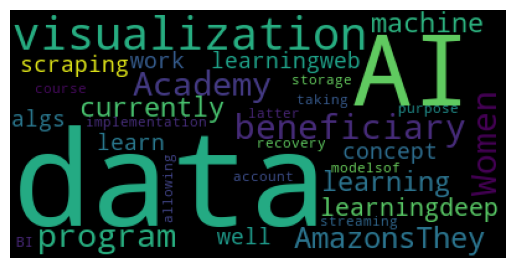

In [27]:
wordcloud = WordCloud().generate(text=texte)
plt.imshow(wordcloud)
plt.axis("off")
plt.show

## Vectorization

In [28]:
phrase_1="Je suis un Data Analyst Data scientist Data Engineer et IA specialiste"
phrase_2="Dans la cohorte actuelle de WIADA nous avons des Data Analyst etdes Data Engineer"
phrase_3="Stella AGUEMON desire devenir Data Scientist"

In [29]:
tokens_1=phrase_1.split()
tokens_1.extend(phrase_2.split())
tokens_1.extend(phrase_3.split())

In [30]:
tokens_1.extend(phrase_3.split())

In [31]:
tokens_1

['Je',
 'suis',
 'un',
 'Data',
 'Analyst',
 'Data',
 'scientist',
 'Data',
 'Engineer',
 'et',
 'IA',
 'specialiste',
 'Dans',
 'la',
 'cohorte',
 'actuelle',
 'de',
 'WIADA',
 'nous',
 'avons',
 'des',
 'Data',
 'Analyst',
 'etdes',
 'Data',
 'Engineer',
 'Stella',
 'AGUEMON',
 'desire',
 'devenir',
 'Data',
 'Scientist',
 'Stella',
 'AGUEMON',
 'desire',
 'devenir',
 'Data',
 'Scientist']

In [32]:
tokens_2=list(set([elt for elt in phrase_1.split()+phrase_2.split()+phrase_3.split()]))

In [33]:
tokens_2

['cohorte',
 'IA',
 'Je',
 'Scientist',
 'Dans',
 'Analyst',
 'specialiste',
 'avons',
 'nous',
 'etdes',
 'WIADA',
 'AGUEMON',
 'la',
 'scientist',
 'Engineer',
 'suis',
 'de',
 'et',
 'Data',
 'desire',
 'actuelle',
 'Stella',
 'des',
 'devenir',
 'un']

In [34]:
vect_1= [phrase_1.count(elt) for elt in tokens_2 ]

In [35]:
vect_1

[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1]

In [36]:
tokens_2

['cohorte',
 'IA',
 'Je',
 'Scientist',
 'Dans',
 'Analyst',
 'specialiste',
 'avons',
 'nous',
 'etdes',
 'WIADA',
 'AGUEMON',
 'la',
 'scientist',
 'Engineer',
 'suis',
 'de',
 'et',
 'Data',
 'desire',
 'actuelle',
 'Stella',
 'des',
 'devenir',
 'un']

In [37]:
def vectorize_sentence(sentence,tokens):
    return [sentence.split().count(elt) for elt in tokens]

In [38]:
vect_1=vectorize_sentence(phrase_1,tokens_2)
vect_1

[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 1]

In [39]:
phrase_1

'Je suis un Data Analyst Data scientist Data Engineer et IA specialiste'

In [40]:
vect_2=vectorize_sentence(phrase_2,tokens_2)
vect_2

[1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0]

In [41]:
phrase_2

'Dans la cohorte actuelle de WIADA nous avons des Data Analyst etdes Data Engineer'

In [42]:
vect_3=vectorize_sentence(phrase_3,tokens_2)
vect_3

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]

In [43]:
phrase_3

'Stella AGUEMON desire devenir Data Scientist'

In [44]:
data=pd.DataFrame([vect_1,vect_2,vect_3],columns=tokens_2, index=["phrase_1","phrase_2","phrase_3"])

In [45]:
data

,cohorte,IA,Je,Scientist,Dans,Analyst,specialiste,avons,nous,etdes,...,suis,de,et,Data,desire,actuelle,Stella,des,devenir,un
phrase_1,0,1,1,0,0,1,1,0,0,0,...,1,0,1,3,0,0,0,0,0,1
phrase_2,1,0,0,0,1,1,0,1,1,1,...,0,1,0,2,0,1,0,1,0,0
phrase_3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0


In [46]:
IDF=[((elt in phrase_1)+(elt in phrase_2)+(elt in phrase_3))/3 for elt in tokens_2]

In [47]:
IDF

[0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333]

In [48]:
data_idf=pd.DataFrame([IDF],columns=tokens_2,index=["IDF"])

In [49]:
data_idf

,cohorte,IA,Je,Scientist,Dans,Analyst,specialiste,avons,nous,etdes,...,suis,de,et,Data,desire,actuelle,Stella,des,devenir,un
IDF,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.666667,0.666667,1.0,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333


In [50]:
TF=[phrase_1.split().count(elt)+phrase_2.split().count(elt)+phrase_3.split().count(elt) for elt in tokens_2]

In [51]:
TF

[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1]

In [52]:
data_if=pd.DataFrame([TF],columns=tokens_2,index=["TF"])

In [53]:
data_if

,cohorte,IA,Je,Scientist,Dans,Analyst,specialiste,avons,nous,etdes,...,suis,de,et,Data,desire,actuelle,Stella,des,devenir,un
TF,1,1,1,1,1,2,1,1,1,1,...,1,1,1,6,1,1,1,1,1,1


In [54]:
score=pd.concat([data_idf,data_if])

In [55]:
score

,cohorte,IA,Je,Scientist,Dans,Analyst,specialiste,avons,nous,etdes,...,suis,de,et,Data,desire,actuelle,Stella,des,devenir,un
IDF,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.666667,0.666667,1.0,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333
TF,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
f= lambda x : x[0]*x[1]

In [57]:
TF_IDF=score.apply(f,axis=0)

In [58]:
TF_IDF=pd.DataFrame(TF_IDF,columns=["TF_IDF"])

In [59]:
TF_IDF

,TF_IDF
cohorte,0.333333
IA,0.666667
Je,0.333333
Scientist,0.333333
Dans,0.333333
Analyst,1.333333
specialiste,0.333333
avons,0.333333
nous,0.333333
etdes,0.333333


In [60]:
TF_IDF_score=pd.concat([score,TF_IDF.T])

In [61]:
TF_IDF_score

,cohorte,IA,Je,Scientist,Dans,Analyst,specialiste,avons,nous,etdes,...,suis,de,et,Data,desire,actuelle,Stella,des,devenir,un
IDF,0.333333,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.666667,0.666667,1.0,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333
TF,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
TF_IDF,0.333333,0.666667,0.333333,0.333333,0.333333,1.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.666667,0.666667,6.0,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333


In [62]:
#u.v=||u||.||v||.cos(u,v)
#cos(u,v)=u.v/||u||.||v||

In [63]:
#u_norme=np.linalg.norm(u)
#v_norme=np.linalg.norm(u)
#u_scalaire_v=np.dot(u,v)
def scalaire(u,v):
    return sum([elt1*elt2 for elt1,elt2 in zip(u,v)])
def get_norm(u):
    return math.sqrt(sum([elt**2 for elt in u]))

In [64]:
array1=np.array([1,3,2])
array2=np.array([-5,0,1])

In [65]:
scalaire(array1,array2)

-3

In [66]:
 get_norm(array1)

3.7416573867739413

In [67]:
def cosinus(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [68]:
cosinus(vect_1,vect_2)

0.47140452079103173

In [69]:
cosinus(vect_1,vect_3)

0.2886751345948129

In [70]:
cosinus(array1,array2)

-0.15724272550828775

In [71]:
vectorizer = TfidfVectorizer()

In [72]:
document=vectorizer.fit_transform([corpus])

In [73]:
for elt in document:
    print(elt)

  (0, 29)	0.08219949365267865
  (0, 11)	0.08219949365267865
  (0, 16)	0.08219949365267865
  (0, 40)	0.08219949365267865
  (0, 5)	0.08219949365267865
  (0, 33)	0.08219949365267865
  (0, 20)	0.08219949365267865
  (0, 32)	0.08219949365267865
  (0, 30)	0.08219949365267865
  (0, 1)	0.08219949365267865
  (0, 19)	0.08219949365267865
  (0, 34)	0.08219949365267865
  (0, 13)	0.08219949365267865
  (0, 26)	0.08219949365267865
  (0, 18)	0.08219949365267865
  (0, 37)	0.08219949365267865
  (0, 38)	0.08219949365267865
  (0, 43)	0.08219949365267865
  (0, 3)	0.08219949365267865
  (0, 17)	0.08219949365267865
  (0, 21)	0.08219949365267865
  (0, 36)	0.08219949365267865
  (0, 12)	0.08219949365267865
  (0, 4)	0.08219949365267865
  (0, 41)	0.08219949365267865
  (0, 9)	0.1643989873053573
  (0, 31)	0.08219949365267865
  (0, 24)	0.08219949365267865
  (0, 23)	0.08219949365267865
  (0, 25)	0.08219949365267865
  (0, 39)	0.08219949365267865
  (0, 22)	0.08219949365267865
  (0, 14)	0.08219949365267865
  (0, 6)	0.08219

In [74]:
lsa=TruncatedSVD(3)

In [75]:
lsa_matrix=lsa.fit_transform(document)

C:\Users\asus\anaconda33\lib\site-packages\sklearn\decomposition\_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


In [76]:
lsa_matrix

array([[1.]])

In [77]:
names=vectorizer.get_feature_names_out()
names

array(['academy', 'account', 'ai', 'algs', 'all', 'allowing',
       'amazonsthey', 'and', 'are', 'as', 'beneficiaries', 'bi',
       'concepts', 'course', 'currently', 'data', 'for', 'how',
       'implementation', 'into', 'latter', 'learn', 'learning',
       'learningdeep', 'learningweb', 'machine', 'modelsof', 'of',
       'program', 'purpose', 'recovery', 'scraping', 'storage',
       'streaming', 'taking', 'the', 'they', 'to', 'up', 'visualization',
       'visualizations', 'well', 'women', 'work'], dtype=object)

In [78]:
for i,elt in enumerate(lsa.components_):
    print([names[j] for j in elt.argsort()[:3:-1]])

['the', 'of', 'data', 'and', 'as', 'ai', 'are', 'concepts', 'implementation', 'how', 'for', 'currently', 'course', 'work', 'bi', 'beneficiaries', 'latter', 'amazonsthey', 'allowing', 'all', 'algs', 'account', 'into', 'learn', 'women', 'learning', 'well', 'visualizations', 'visualization', 'up', 'to', 'they', 'taking', 'streaming', 'storage', 'scraping', 'recovery', 'purpose', 'program', 'modelsof']


In [79]:
similary=cosine_similarity(document[0],document)

In [80]:
similary

array([[1.]])

In [81]:
corpus_1 = ["Natural language processing (NLP) is a subfield of artificial intelligence (AI) that ",
"focuses on the interaction between computers and humans using natural language. It encompassesvarious",
"techniques such as sentiment analysis, part-of-speech tagging, and named entity recognition.Sentiment analysis" ,
"aims to determine the attitude or emotional tone of a piece of text, while namedentity recognition is a technique that classifies named",
         "Part-of-speech tagging assigns a grammatical category to each word in a sentence, which is crucial",
"for syntactic parsing, a process involving the analysis of the grammatical structure of sentences",
"to understand their meaning. Word embedding is another technique used in NLP, representing",
"words in a continuous vector space, facilitating tasks such as information retrieval and document",
"summarization." ,
"Chatbots are computer programs designed to simulate human conversation using natural language.",
"They leverage techniques like language modeling and text generation to produce human-like responses.",
"Information retrieval, on the other hand, involves obtaining relevant information from",
"a collection of data, often using techniques like topic modeling to discover abstract topics withindocuments.",
"Dependency parsing is a technique used to analyze the grammatical structure of sentences based on dependencies between words. It plays a crucial role in tasks such as machine translation and text",
"classification. Word sense disambiguation, another important task, aims to determine the correct",
"meaning of a word based on its context, facilitating accurate language understanding.",
"Machine translation is the process of automatically translating text or speech from one language to another. This task often relies on techniques such as named entity recognition and part-ofspeechtagging to preserve the meaning and grammatical structure of the original text. Languagemodeling, which involves predicting the next word in a sequence of text given the previous words,is fundamental to many NLP tasks, including machine translation and text generation.",
"In summary, NLP encompasses a wide range of techniques and tasks, including sentiment analysis,part-of-speech tagging, named entity recognition, language modeling, and machine translation." ,
"These techniques play a vital role in enabling computers to understand and generate human language, paving the way for applications such as chatbots, information retrieval systems, andautomated translation services." 
         ]

In [82]:
document_1=vectorizer.fit_transform(corpus_1)

In [83]:
for elt in document_1:
    print(elt)

  (0, 133)	0.3134601852595314
  (0, 2)	0.35733036273472063
  (0, 61)	0.35733036273472063
  (0, 11)	0.35733036273472063
  (0, 82)	0.17288144256514795
  (0, 121)	0.35733036273472063
  (0, 65)	0.22178495410839935
  (0, 80)	0.25819029809698424
  (0, 100)	0.35733036273472063
  (0, 68)	0.19459344403691395
  (0, 78)	0.2823337989872924
  (0, 43)	0.33534762038127225
  (0, 66)	0.29417630902273906
  (0, 148)	0.2649647987341133
  (0, 56)	0.33534762038127225
  (0, 6)	0.18262217601704692
  (0, 24)	0.29417630902273906
  (0, 17)	0.29417630902273906
  (0, 62)	0.33534762038127225
  (0, 134)	0.18262217601704692
  (0, 85)	0.2237934873755801
  (0, 46)	0.33534762038127225
  (0, 68)	0.18262217601704692
  (0, 78)	0.2649647987341133
  (0, 104)	0.22069761506720012
  (0, 44)	0.24133515685377152
  (0, 76)	0.22069761506720012
  (0, 127)	0.24133515685377152
  (0, 119)	0.22069761506720012
  (0, 91)	0.22069761506720012
  (0, 4)	0.48267031370754304
  (0, 114)	0.5358831514212451
  (0, 12)	0.20383551564838356
  (0, 122)

In [84]:
similary_1=cosine_similarity(document_1[0],document_1)
similary_1

array([[1.        , 0.1103456 , 0.02554786, 0.15432471, 0.0723142 ,
        0.05585067, 0.11229675, 0.        , 0.        , 0.10864337,
        0.03220011, 0.        , 0.02564101, 0.0523631 , 0.        ,
        0.06884936, 0.10459423, 0.11695807, 0.02370827]])

In [85]:
#cosinus_similarity, plus le cos est proche de 1,plus les phrases sont similaires
#cosinus_distances, plus la distance est proche de 0,plus les phrases sont similaires

In [86]:
distance=cosine_distances(document_1[0],document_1)
distance

array([[0.        , 0.8896544 , 0.97445214, 0.84567529, 0.9276858 ,
        0.94414933, 0.88770325, 1.        , 1.        , 0.89135663,
        0.96779989, 1.        , 0.97435899, 0.9476369 , 1.        ,
        0.93115064, 0.89540577, 0.88304193, 0.97629173]])

In [111]:
#pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [112]:
import spacy

In [113]:
corpus_1[0]

'Natural language processing (NLP) is a subfield of artificial intelligence (AI) that '

In [117]:
pip install spacy --upgrade

In [119]:
nlp_spacy=spacy.load("fr_core_news_sm")

In [120]:
doc=nlp_spacy("Imma Conception estune fille dangereuse vivant au Bénin")

In [121]:
spacy.displacy.render(doc,'ent')

In [122]:
def get_name_entity(mot):
    doc=nlp_spacy(mot)
    spacy.displacy.render(doc,'ent')

In [123]:
get_name_entity("John est un travailleur,il bosse à l'ONU")


In [124]:
get_name_entity("John est un travailleur. Il vit à Cotonou")

In [131]:
get_name_entity("Babatounde est un travailleur. Il vit à yong kong")